<a href="https://colab.research.google.com/github/AKASH-CR/Machine-Failure-Prediction/blob/main/Machine_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay




In [ ]:

warnings.filterwarnings('ignore')

Data Reading

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/personal projects/Machine failure/Machine Failure-dataset.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2899.0,L49322,L,301.2,308.8,1829.0,44.4,68.0,0.0,No Failure
1,5269.0,L52223,L,300.5,311.4,1639.0,43.6,15.0,0.0,No Failure
2,4085.0,L49936,M,298.1,310.0,1446.0,46.9,16.0,0.0,No Failure
3,3168.0,H30102,L,303.6,309.7,1383.0,42.2,57.0,0.0,No Failure
4,2777.0,L50759,H,300.8,310.9,1288.0,44.7,36.0,0.0,No Failure
...,...,...,...,...,...,...,...,...,...,...
20995,9425.0,L57047,L,297.8,308.7,1443.0,18.7,0.0,0.0,No Failure
20996,3998.0,L53171,L,300.8,312.1,1596.0,32.4,62.0,0.0,No Failure
20997,4196.0,L52092,L,303.7,312.7,1402.0,50.3,20.0,0.0,No Failure
20998,4512.0,L53940,L,301.1,310.7,1647.0,42.6,144.0,0.0,No Failure


**Feature** **Explanation**



**Type** :The three possible values for this feature are H/M/L which stand for Heavy, Medium and Light. This is generally on basis of size, weight and power. Heavy : Excavators, bulldozers, cranes Medium: Tractors, Forklifts Light : Household appliances, Electronics



**Air temperature [K]**: Temperature of the surrounding air, typically measured in Kelvin (K). Monitoring the air temperature is important to ensure proper cooling and prevent overheating of various components.



**Process temperature[K]**: It refers to the temperature of a operation within a machine, also measured in Kelvin (K). To maintain the desired operating conditions and ensure optimal performance.



**Rotational speed [rpm]**: How fast an object or component rotates around its axis, typically expressed in revolutions per minute (rpm). It is a fundamental parameter in machines, such as motors, engines, and rotating equipment, indicating the rotational velocity.



**Torque [Nm]**: Force that causes an object to rotate about an axis. It represents the twisting or turning force applied to a machine component, such as a shaft or gear, to produce rotational motion.



**Tool wear [min]**: Tool wear refers to the gradual deterioration or loss of material from a cutting or machining tool during its use. Remaining lifespan of the tool before it needs to be replaced or reconditioned.

EDA

In [ ]:
df.drop(["UDI",	"Product ID","Target"],axis=1,inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,301.2,308.8,1829.0,44.4,68.0,No Failure
1,L,300.5,311.4,1639.0,43.6,15.0,No Failure
2,M,298.1,310.0,1446.0,46.9,16.0,No Failure
3,L,303.6,309.7,1383.0,42.2,57.0,No Failure
4,H,300.8,310.9,1288.0,44.7,36.0,No Failure
...,...,...,...,...,...,...,...
20995,L,297.8,308.7,1443.0,18.7,0.0,No Failure
20996,L,300.8,312.1,1596.0,32.4,62.0,No Failure
20997,L,303.7,312.7,1402.0,50.3,20.0,No Failure
20998,L,301.1,310.7,1647.0,42.6,144.0,No Failure


In [ ]:
df.isna().sum()

,0
Type,17
Air temperature [K],19
Process temperature [K],21
Rotational speed [rpm],23
Torque [Nm],19
Tool wear [min],24
Failure Type,22


In [ ]:
missing_percentage=df.isnull().sum()*100/len(df)
print(missing_percentage)

Type                       0.080952
Air temperature [K]        0.090476
Process temperature [K]    0.100000
Rotational speed [rpm]     0.109524
Torque [Nm]                0.090476
Tool wear [min]            0.114286
Failure Type               0.104762
dtype: float64


In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,20981.000000,20979.000000,20977.00000,20981.000000,20976.000000
mean,299.889381,310.058740,1526.95476,40.824060,109.643259
std,2.107411,1.484678,198.54192,10.385853,59.699284
min,295.300000,305.700000,1168.00000,4.900000,0.000000
25%,298.200000,309.000000,1416.00000,36.000000,60.000000
50%,300.100000,310.200000,1487.00000,41.600000,108.000000
75%,301.500000,311.000000,1576.00000,46.900000,159.000000
max,304.500000,313.800000,2886.00000,76.600000,248.000000


In [ ]:
df.dropna()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,301.2,308.8,1829.0,44.4,68.0,No Failure
1,L,300.5,311.4,1639.0,43.6,15.0,No Failure
2,M,298.1,310.0,1446.0,46.9,16.0,No Failure
3,L,303.6,309.7,1383.0,42.2,57.0,No Failure
4,H,300.8,310.9,1288.0,44.7,36.0,No Failure
...,...,...,...,...,...,...,...
20995,L,297.8,308.7,1443.0,18.7,0.0,No Failure
20996,L,300.8,312.1,1596.0,32.4,62.0,No Failure
20997,L,303.7,312.7,1402.0,50.3,20.0,No Failure
20998,L,301.1,310.7,1647.0,42.6,144.0,No Failure


In [ ]:
df.isna().sum()

,0
Type,17
Air temperature [K],19
Process temperature [K],21
Rotational speed [rpm],23
Torque [Nm],19
Tool wear [min],24
Failure Type,22


In [ ]:
df.drop_duplicates()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,301.2,308.8,1829.0,44.4,68.0,No Failure
1,L,300.5,311.4,1639.0,43.6,15.0,No Failure
2,M,298.1,310.0,1446.0,46.9,16.0,No Failure
3,L,303.6,309.7,1383.0,42.2,57.0,No Failure
4,H,300.8,310.9,1288.0,44.7,36.0,No Failure
...,...,...,...,...,...,...,...
20995,L,297.8,308.7,1443.0,18.7,0.0,No Failure
20996,L,300.8,312.1,1596.0,32.4,62.0,No Failure
20997,L,303.7,312.7,1402.0,50.3,20.0,No Failure
20998,L,301.1,310.7,1647.0,42.6,144.0,No Failure


Checking Outliers

In [ ]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  outliers=df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  # to_nan= df.where((df>=lower)&(df<=upper),np.nan)
  return outliers

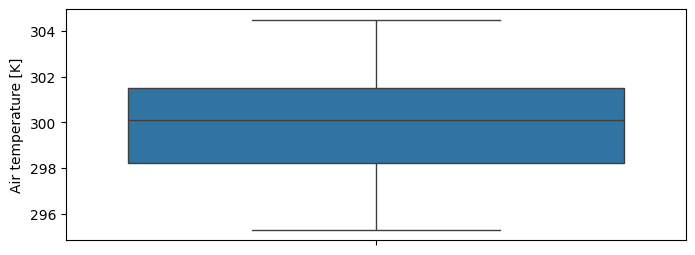

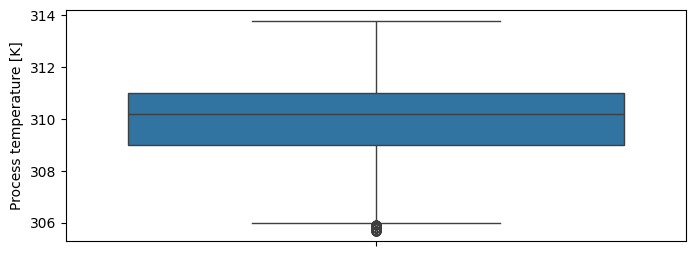

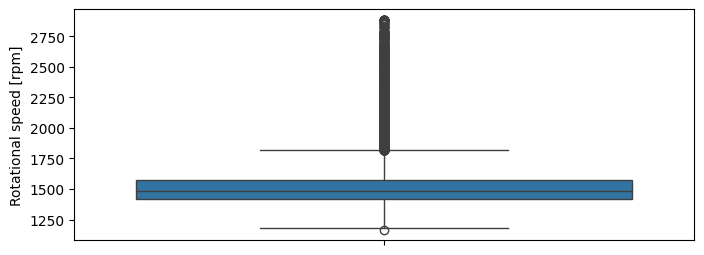

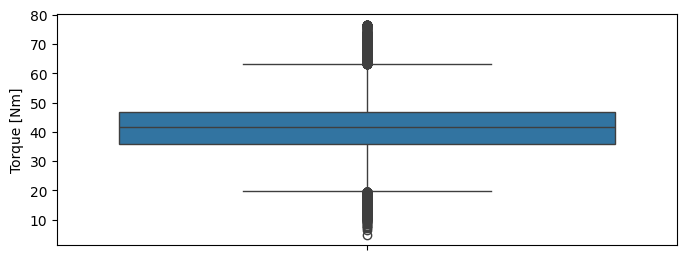

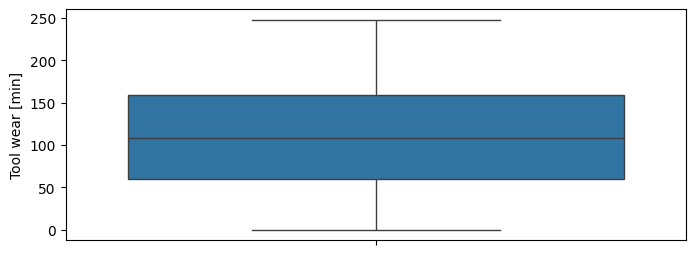

In [ ]:
features=["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
for feature in features:
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df[feature])
  plt.show()


In [ ]:
outliers=find_outliers_IQR(df["Rotational speed [rpm]"])
print("Number of outliers:",len(outliers))
print("Max of outliers:",outliers.max())
print("Min of outliers:",outliers.min())
outliers

Number of outliers: 1429
Max of outliers: 2886.0
Min of outliers: 1168.0


,Rotational speed [rpm]
0,1829.0
20,1953.0
22,1940.0
30,2781.0
34,2661.0
...,...
20934,2051.0
20943,1880.0
20964,1884.0
20966,2019.0


In [ ]:
outliers=find_outliers_IQR(df["Torque [Nm]"])
print("Number of outliers:",len(outliers))
print("Max of outliers:",outliers.max())
print("Min of outliers:",outliers.min())
outliers

Number of outliers: 1300
Max of outliers: 76.6
Min of outliers: 4.9


,Torque [Nm]
30,15.0
34,12.5
37,13.0
58,68.0
60,15.5
...,...
20906,66.9
20928,64.8
20976,17.5
20987,18.9


In [ ]:
outliers=find_outliers_IQR(df["Process temperature [K]"])
print("Number of outliers:",len(outliers))
print("Max of outliers:",outliers.max())
print("Min of outliers:",outliers.min())
outliers

Number of outliers: 87
Max of outliers: 305.9
Min of outliers: 305.7


,Process temperature [K]
327,305.9
456,305.8
535,305.7
612,305.9
1146,305.7
...,...
20029,305.7
20362,305.9
20375,305.9
20661,305.8


Converting outlier to NaN

In [ ]:
def to_nan(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  return df.where((df>=lower)&(df<=upper),np.nan)

In [ ]:
cols=["Process temperature [K]","Rotational speed [rpm]","Torque [Nm]"]
for i in cols:
  df[i]=to_nan(df[i])


In [ ]:
df.isna().sum()

,0
Type,17
Air temperature [K],19
Process temperature [K],108
Rotational speed [rpm],1452
Torque [Nm],1319
Tool wear [min],24
Failure Type,22


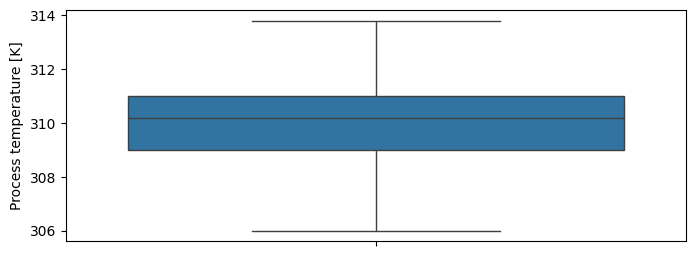

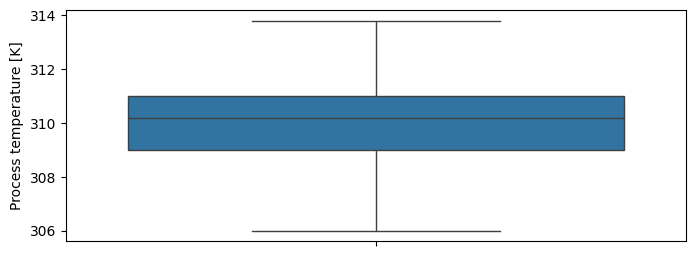

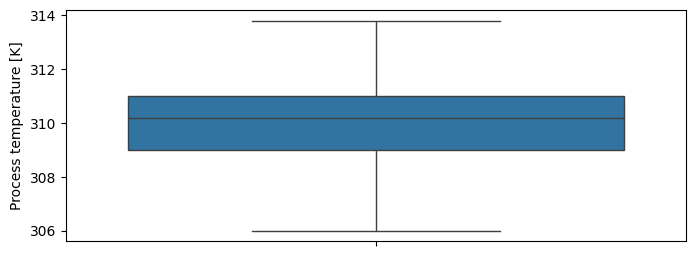

In [ ]:
columns=["Process temperature [K]","Rotational speed [rpm]","Torque [Nm]"]
for i in columns:
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df["Process temperature [K]"])
  plt.show()


In [ ]:
cols=["Type","Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Failure Type"]
for col in cols:
  df[col]=df[col].fillna(df[col].mode()[0])
df.isna().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Failure Type,0


In [ ]:
df.dtypes

,0
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],float64
Torque [Nm],float64
Tool wear [min],float64
Failure Type,object


In [ ]:
df["Failure Type"].unique()

array(['No Failure', 'Random Failures', 'Power Failure',
       'Overstrain Failure', 'Heat Dissipation Failure',
       'Tool Wear Failure'], dtype=object)

In [ ]:
df["Type"].unique()

array(['L', 'M', 'H'], dtype=object)

In [ ]:
Light=df[df["Type"]=="L"]
Medium=df[df["Type"]=="M"]
Heavy=df[df["Type"]=="H"]

In [ ]:
Light

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,301.2,308.8,1477.0,44.4,68.0,No Failure
1,L,300.5,311.4,1639.0,43.6,15.0,No Failure
3,L,303.6,309.7,1383.0,42.2,57.0,No Failure
6,L,298.1,307.9,1376.0,45.9,134.0,No Failure
7,L,297.0,312.1,1437.0,39.5,60.0,No Failure
...,...,...,...,...,...,...,...
20993,L,298.9,309.3,1480.0,44.0,187.0,No Failure
20995,L,297.8,308.7,1443.0,41.7,0.0,No Failure
20996,L,300.8,312.1,1596.0,32.4,62.0,No Failure
20997,L,303.7,312.7,1402.0,50.3,20.0,No Failure


Failure Type distribution in Low

In [ ]:
target=Light["Failure Type"].value_counts(normalize=True)*100
target

,proportion
Failure Type,
No Failure,95.939683
Overstrain Failure,1.162067
Power Failure,1.155150
Heat Dissipation Failure,1.099813
Tool Wear Failure,0.359687
Random Failures,0.283600


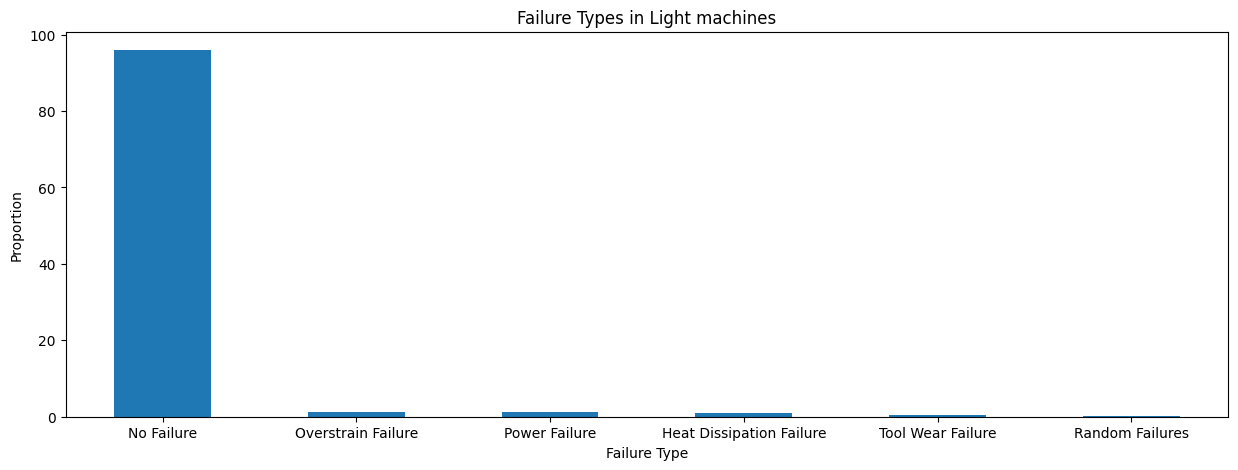

In [ ]:
target.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Failure Types in Light machines')
plt.xlabel('Failure Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [ ]:
target2=Medium["Failure Type"].value_counts(normalize=True)*100
target2

,proportion
Failure Type,
No Failure,97.799511
Power Failure,1.022449
Heat Dissipation Failure,0.511225
Tool Wear Failure,0.444543
Overstrain Failure,0.133363
Random Failures,0.088909


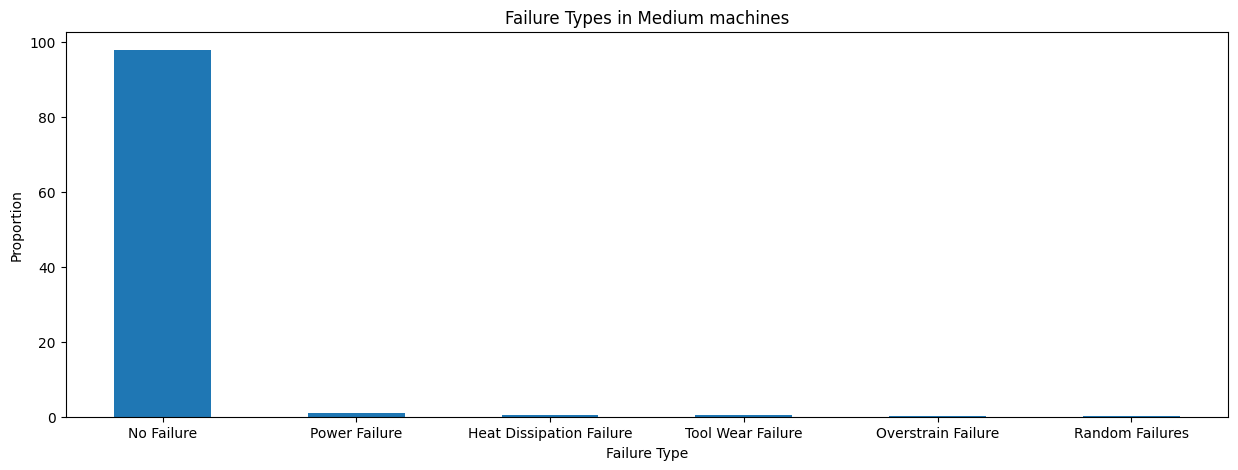

In [ ]:
target2.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Failure Types in Medium machines')
plt.xlabel('Failure Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [ ]:
target3=Heavy["Failure Type"].value_counts(normalize=True)*100
target3

,proportion
Failure Type,
No Failure,98.238748
Power Failure,0.733855
Heat Dissipation Failure,0.342466
Overstrain Failure,0.244618
Tool Wear Failure,0.244618
Random Failures,0.195695


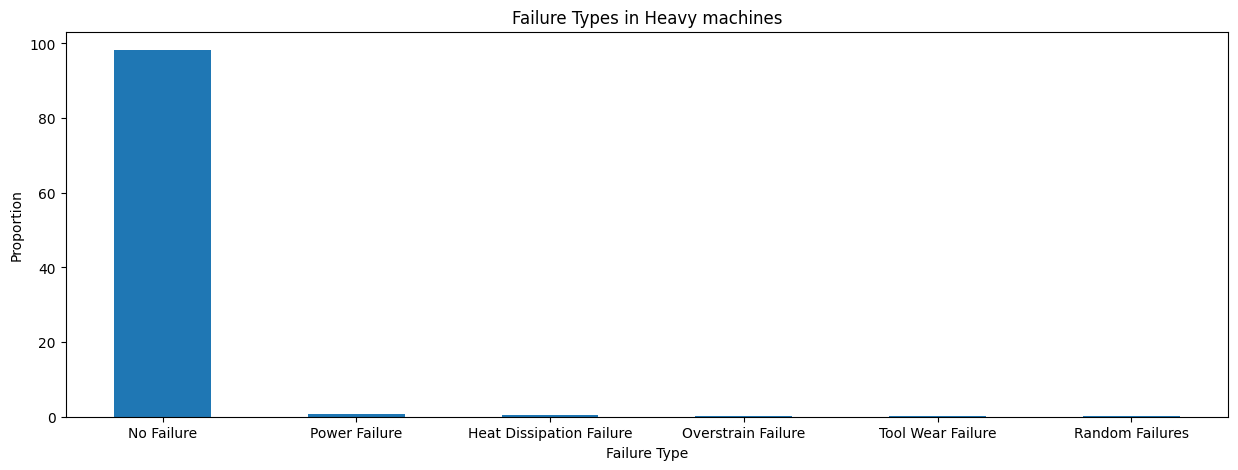

In [ ]:
target3.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Failure Types in Heavy machines')
plt.xlabel('Failure Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

Encoding Categorical value to Numerical

In [ ]:

encoder=LabelEncoder()
df["Type"]=encoder.fit_transform(df["Type"])
df["Failure Type"]=encoder.fit_transform(df["Failure Type"])

In [ ]:
df.head(30)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,301.2,308.8,1477.0,44.4,68.0,1
1,1,300.5,311.4,1639.0,43.6,15.0,1
2,2,298.1,310.0,1446.0,46.9,16.0,1
3,1,303.6,309.7,1383.0,42.2,57.0,1
4,0,300.8,310.9,1288.0,44.7,36.0,1
5,2,298.1,309.3,1407.0,31.4,113.0,1
6,1,298.1,307.9,1376.0,45.9,134.0,1
7,1,297.0,312.1,1437.0,39.5,60.0,1
8,1,301.9,310.8,1532.0,45.3,142.0,1
9,1,297.3,309.3,1562.0,46.5,189.0,1


In [ ]:
df["Failure Type"].unique()

array([1, 4, 3, 2, 0, 5])

Taking Heatmap to analyse correlation

<Axes: >

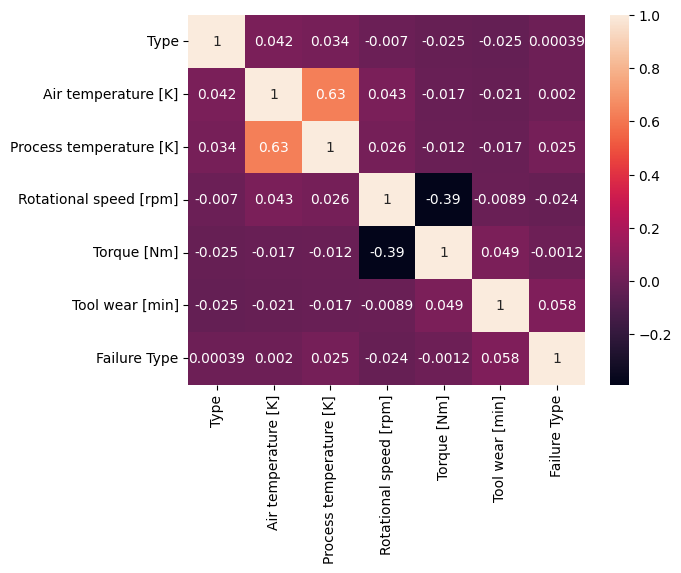

In [ ]:

sns.heatmap(df.corr(),annot=True)

Splitting Input & Output

In [ ]:
#Input
X=df.iloc[:,:-1]
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,301.2,308.8,1477.0,44.4,68.0
1,1,300.5,311.4,1639.0,43.6,15.0
2,2,298.1,310.0,1446.0,46.9,16.0
3,1,303.6,309.7,1383.0,42.2,57.0
4,0,300.8,310.9,1288.0,44.7,36.0
...,...,...,...,...,...,...
20995,1,297.8,308.7,1443.0,41.7,0.0
20996,1,300.8,312.1,1596.0,32.4,62.0
20997,1,303.7,312.7,1402.0,50.3,20.0
20998,1,301.1,310.7,1647.0,42.6,144.0


In [ ]:
#Output
y=df.iloc[:,-1]
y

,Failure Type
0,1
1,1
2,1
3,1
4,1
...,...
20995,1
20996,1
20997,1
20998,1


Checking class distribution

In [ ]:
y.value_counts()

,count
Failure Type,
1,20278
3,228
0,189
2,179
5,77
4,49


Balancing class distribution

Over Sampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)


In [ ]:
y_os.value_counts()

,count
Failure Type,
1,20278
4,20278
3,20278
2,20278
0,20278
5,20278


Plotting Class distribution before and after sampling

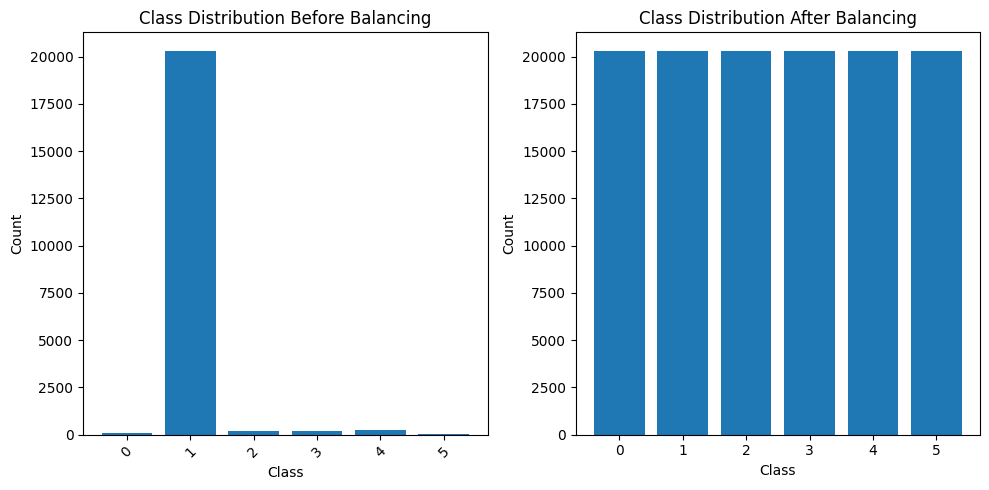

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(y.unique(),y.value_counts())
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(y_os.unique(), y_os.value_counts())
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Normalization

In [ ]:
#Normalisng input to 0-1
scaler=MinMaxScaler()
X_os=scaler.fit_transform(X_os)
X_os

array([[0.5       , 0.64130435, 0.35897436, 0.46698113, 0.56781609,
        0.27419355],
       [0.5       , 0.56521739, 0.69230769, 0.72169811, 0.54942529,
        0.06048387],
       [1.        , 0.30434783, 0.51282051, 0.41823899, 0.62528736,
        0.06451613],
       ...,
       [0.5       , 0.63703061, 0.59354214, 0.57122498, 0.28369523,
        0.25318212],
       [0.5       , 0.77788703, 0.66510041, 0.49498419, 0.45073078,
        0.94810973],
       [0.5       , 0.86956522, 0.64868556, 0.46636809, 0.62020619,
        0.77665365]])

Train-Test Split

In [ ]:

X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

Model Building

In [ ]:
#Creating object of every model
knn=KNeighborsClassifier(n_neighbors=5)
gnb=GaussianNB()
sv=SVC(random_state=42)
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
gb=GradientBoostingClassifier()
xb=XGBClassifier(random_state=42)

KNN-OS

In [ ]:
# knn_os=knn.fit(X_os_train,y_os_train)
# y_os_pred1=knn_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred1))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred1))

Naive Bayas-OS

In [ ]:
# gnb_os=gnb.fit(X_os_train,y_os_train)
# y_os_pred2=gnb_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred2))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred2))

SVC-OS

In [ ]:
# sv_os=sv.fit(X_os_train,y_os_train)
# y_os_pred3=sv_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred3))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred3))

Decision Tree-OS

In [ ]:
# dt_os=dt.fit(X_os_train,y_os_train)
# y_os_pred4=dt_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred4))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred4))

Random Forest-OS

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6119
           1       0.98      0.89      0.93      6155
           2       0.97      1.00      0.98      6031
           3       0.96      0.99      0.97      6096
           4       0.99      1.00      0.99      6031
           5       0.98      1.00      0.99      6069

    accuracy                           0.98     36501
   macro avg       0.98      0.98      0.98     36501
weighted avg       0.98      0.98      0.98     36501



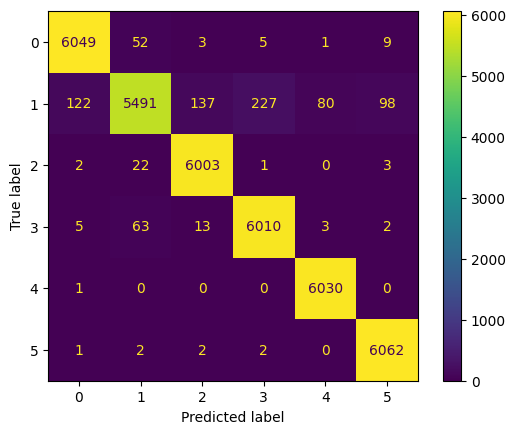

In [ ]:
rf_os=rf.fit(X_os_train,y_os_train)
y_os_pred5=rf_os.predict(X_os_test)
print(classification_report(y_os_test,y_os_pred5))
print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred5))

AdaBoost-OS

In [ ]:
# ada_os=ada.fit(X_os_train,y_os_train)
# y_os_pred6=ada_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred6))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred6))

GradientBoosting-OS

In [ ]:
# gb_os=gb.fit(X_os_train,y_os_train)
# y_os_pred7=gb_os.predict(X_os_test)
# print(classification_report(y_os_test,y_os_pred7))
# print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred7))

Over sampling - Random forest 99%

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X_os,y_os,cv=5,scoring="accuracy")
print("cross validation score",score)
print("mean accuracy",score.mean())

cross validation score [0.97443906 0.98031561 0.97928824 0.97789011 0.98047918]
mean accuracy 0.9784824391328406


In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy:,",accuracy_score(y_os_test,y_os_pred5))

test accuracy:, 0.9765485877099258


Predicting with new value

In [ ]:
y_new=rf_os.predict(scaler.transform([[1,301.6,312.7,1572.0,34.2,219.0]]))
y_new.item()

4

Saving the model

In [ ]:
import pickle
pickle.dump(rf,open("Machine_failure_model.sav","wb"))

In [ ]:
pickle.dump(scaler,open("minmaxscaler.sav","wb"))

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pickle
import streamlit as st
from PIL import Image

def set_bg_hack_url(url):
    st.markdown(
        f"""
        <style>
        .stApp{{
        background:url({url});
        background-size:cover
        }}
        </style>
        """,
        unsafe_allow_html=True

    )
def main():
    set_bg_hack_url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAABa1BMVEX/vC3/vyWJg3b/3JL/uiH/wC6ldgD5uCL/uyvx5Mv/wTiYkH//35j/vi39vC4AAAD/wy7QmiXXoCborCnLlyThpyj/9di4iSHEkiP2tyz/7c3jqSi+jSLvsirZoia1hiCrfx6heBz/9M1RPBDCjxhEMg1nTRJwUxSCYheQaxmofR7pqxrKpVv879SmhEOfjm/SwqT/6b//yS6pn4iKf2pmYFcjIh9NS0J/bE2FYADLrXX/5avvzI3ZpTXew4/NuY//ylJhRQDn06q7kTyFbUAsGQAACBnGu6WrmXsfFgb/14O/kTBZQxCWfEsxJAtubm25mmFBMRCLaibTpEbDpW94bVZXPQC+rIb02abRrGmglXuUdjzQv5+edyQnHQBURSU2ODwQDARzYUCwjkxwVySskV/Fnk+dezEOIDGPZgDIpWHUojx0VABTVVcSFBnqxHkqMTT/127juWUAACQaIzC8r5P//9irkVgnFADa2007AAAOUElEQVR4nO2d+3vTVtLHJfCx68JI56ZbdHRzlFi245AL7RYnxCVpCTQuLQ0tpBC6lCXbkLTdZV/evn/+K8m5kTjG+mG7i6TvDzzGknnM55mZMzNHPiMpoJSaSKBIilRqQpWwMqhEVapUqVKlSpUqVarUByyE5EmEY0104wcuDONYiejmlQn0yafqXya570PXZwb66FJWt3qNlavv1yoDym/vrE1w64et6/3vP7/EuJDXa3xcqVRkuVaRK5dLvjMgGECuETrutjxIPlj+fLRtoShmJSFmEkI8G11mf+CqM+sbMlIUsExnnFfnQPiLlcrIC7Ub8QUkCAIAPG1dSsvyv7y7ec9QEEKYavmmhdr10f/B2rXrFRDWsM2MhX8JLeAfX7+jfrI534zMpjJ7KdNcCFXrH4+8EMOS+UnDmd+/pDGIwq+6i3NfqjM+a20FUf5hjQxaKayj7QuEWy0+kgOQ2uLUlL6yNa2qg2ntMvvLicbBqsUBK2VV/Zo0iTby47FhTU1NLcpmk/jTD0jOY9YYWHbo0pgWhN+s0VlnNAj52xhW9yt5hrmzdGyOmwONtaz+tbotKWj/mutq+BKrkXcX9KmKNYPJIOdr4XhYlZ5eZ0jGg5CayHJHo1Bo5eWOTJtYa+J/6zf9L9BYWLV79dr0vZn7LrGQb4x2MsUnvh9F0za9hGaONBYW1B48jNQWixxkkZZnjzAdoN/VW7OEKZaVe1bjYUlgNVtRpKozVttDs33fOroIqZJX+PDaOo1IvlOGY42HJTn2/QcvVPW+oK22fE82EyggOZx6giTxHOiKvn3I2Z/8rf9Deo9lafjR93d+EIfTmERejW9YsVHZwucGN3zPsAC29QW3KIY1HhbSJPwiePp4a+Xr2ZiWqTw1l8J9X4uRxekq8T1Le9Lda4lzOUNuV8WxsBQbgAVGdUXfuRVhPkuktvHj+tOnIg3miPkiNiyteS4Dc1p5NbSxsFgc0AEhe2GhRmeCmBYlN7rPavYuZSktrfpEn2sb9B1YoBlFhCUPKUBHfegE6LmB+IyoHdQch80Oy2q00ah3ZulxQwJMJ3mTGnlNIsZaVppmgra68pNHrZt/JSR4oQAnNteGntdZ03e89kl4B5LAAm7/Sd/9T9fY2jBtNID4ddOmBN+6qwqrJQnT5q5FkowL8diwBq5z/BGgTpKBpelFLj1xLCyeWhZRv1yisVo//+QucYERDqthvOKhzqreC3fPhHdAikZcBUngenl0xbFuOAw+WHwhNO4K30eR5SmM042rq0Lq0DdxnT1j26dYLGJyYgomAdvNo2mNj1k8TtctKurrHYVoZhs3TYJfNuYa3R4Ldxa7CwdAxWm/2eF2nH8BjVdDlMsVcXwhzQ3T1BRkz0vtgdkmzgx1kfpFo7vX0UijzmsYcOs4cVAsoqQvkWkj4oz6Nz90va+QjpP1pG6mTmxkf2tqLsHumt7vtPZ5vS8Twq1AJMlYfBM6XhXBJpDHiPXeQvrkNmpJ8qufDcrC3UZdC75+09hjJqcatwbJGkAUfLqjYeW1FT8hLCdxNnnQOvh9dbH7SBZ3VroHIUfY5Yyhj7YWF4PgtCJ08toGnBAWTWMQ+nsc2g9u16C2oT+LqxpCiTFnOuZi97Vs0VPLymvHZjJYzknG3qsk8aizo2+HWriyvteoz4V9/VHIxUv3mBbLZXSXJoQFwywdDvR6mlUhd+2x7aHol1eN+u2OVSMvG4359V44hATUGvUP5kATwVJImkzJj/V+WvfBnr7Q4Qrsr+uvaSDwknrltTx/G4ZZxBmHzJkmguUMPQwPrm1FCTY4WJi7xTkzpuqdw15PVNd/7TDXuT2fmhTLaXifDBYclzS46rFhb6bWooFm/vDXe1bw282VxnwvNAhn6ZppObn9cdlEsE4aC9gxteSBLdACE1tu64WKNeu1vlAhAmHudjwrLo9y26GZDJZ5urwhhxNCXeLFqT3H7Jcqwt7ygdXGcTZf/X11V0g53r2YBJZlnHGsdMPQStswDB3oyzLbUKeJRp405lcWBHX83G5XTAbLMUdcB0ZRnHf15Xn9iWdYwS/LN+qhRzya2/A+KaxRIZs6sDVV1/AP/9hbEjZu/fTNfkDDIMdeOBks4yIsIAwqz/SejA3ViGM7Feonwmzv7Ic5Nq2JYpZ3ISUHO8485Rt1DXFl7/FTzAlSZw3i/fy4/6j1b/3C/0lNAkvxzmcDoCX2Ax3VtCJzrz7nUEpeRNw0xexb1y92nmWea1AB46mtgRW5wkEdM3bAyJ52qEnEDA1y64cTwaLeu5+h/JgHZslOPlJIhAERYiN0timfN01UG1remQe7QSHkfAwDN3moO20m57SjnGoiWIj4BA0hgGKLEdlBPjdVz2vCTqnwBVMAKY7dpvntKrxPE8JSiO8bhvB8TlFhWU0KS0JWstRpjlRcVJPDSsIS5Dl4T6LJYZUqYWVRCSuDSlgZVMLKoBJWBpWwMqiElUElrAwqYWVQCSuDSlgZVMLKoBJWBpWwMqiElUElrAwqYWVQCSuDSlgZVMLKoBJWBpWwMqiElUElrAwqYWVQCSuDSlgZVMLKoBJWBpWwMqiElUElrAwqYWVQCSuDSlgZVMLKoBJWBpWwMqiElUElrAwqYWVQCWu0Rv7ypoQ1UswUzkVeJawRQsSyfcK5c+4np0WEdTpU4hI5L6Iaju/Qzs3VKyAs5HJO+JhTZ3Gkvup3kmlW8a1naRUOFlg+QwCIRpfOn0K+r17ZnLcBA1bE2QsFgwUOh3QAGjity2ZXQvjPOfXu8r39Jt8VtH1qgkWDhUx0NIbQMS4bQaV1FvXVW6oaER5tNM+crVM0WIxJR2MIrWl/9HmqsWF1p6Yavx+q6sPnRnSGaMFggTmcQghW6++8SUbfE65MTU11rzIzotHgeYFh+R3XSuam3tnc9pv2yANVgS3oMa2P7YdLQfDO4ShFg0XeLvcrsRN+2qMUaaNPn0WdV3X9umzsIjF4J8EoGCypU9f7FYycB5pGkDv6jCHQau7bz8H3cMsrNCx0sLDW+f6P+01mIjxAowfNUlG7dRg0feDv0iwaLAlXf2s9fNG2oyXk+m1jVNmjhNfeViNqO+65MYSFgyVhY9YbRKoq7JZF/zJ3kkYhhIbkQDtcmNs3NHThKJniwQLWVh+ocQ5liWlp+9vhWARAtmsKkk7hgIOpujs76pzH4sFiVu3tD88jTzUtcwZRYiIJKZpveEIEnk8BkjlVvjfq6PHiwdIQVcmNb9+sqtThM3hrwwVvn2uJGyJN+Bzx2LAG9N0PDR20cLCYJSE/CFuNOr/PmDnA1PzuWf9vG8NRX2B6ZFXvGf67p88BTXOIosGC5Gh7hPBetycHLyxbzCr7m/HrjWB4YiaIaiOJWCfpagoNuJlOWCgYLIsdOZQaaJyrSPMeKLcPZAe8Znod7N47A9DAT+O/oRUR1nAYCdpaeT3NHW95Rmk3W9gxbUr84VgAstilTXrSj4ChSQWppRUN1rAcxIPlfk042vO7DxTPcAShhKK0g1zb0fu0dboUJu/G0X045bhwsFKbwU3VW+LEMWc/m8XIoBhTEqbRLIwNKyLa6QeQwjQ36amCYRcNFkuXOaREux7jQrSYQSjHlIZvVrc1bIersWE1TydSAXLNZBSTqUjQdnHBYEkGQ4AY/VZ/LTOX7RKryW13dX1Vr2/T6upi/VlHc7wzXkhiL0SOGSf0iigcLMcwCLeVyt6WNBOY3y35kYH9f/X0uq11dvRnnQpCSvP4ZjjaZ4Vk2IKBiuaGEihOOoYQOYQRLHanHeLg/UV9TwTVXvegFjsdiggMk/aTtgPiTgED/FnFax67eUchYbWnL3QOX11dCVhcTNss8BE4RMPs5GRkSJOJ4sIC20l2p1Wy/eaqXj9wdluNhY6hYZzYFnTmGmtn53Fo6YjswsJS0loZkThczR24AHRVnyPECjuhueVac3r9NiYnzT9IM47CwgJNGw5+nupyOUk7w8V6x4eNxqN4YTSr9fpWSDd85Xh06nBwdlFhKWaay9d6+jM5eYEO+i8pBfXKWhy/HKxt7TSefN3YPeoBAilibXgiNuyQ0il9Oy0Xk0GXLsXabKPu+lUNh/+zeVC7AXS4ZWEPS8qCwhoubxK4v74Ng8TXrEd1OmtT+5Hed6PVjXDj7UPsauilSE1rWFgXFZZ0tNUMziEdhnE5FIFg4sW1ORL9+rqx9mrPMAkflkdgF7NTeiTreIQJ4HgJTOdge76NmD9QA4mGT+JqyHexY0DIAODooYiiwnJOH+kDhfI4E3WSrQvGlr5TPwL5s80K5wrRfHN1J7Dto5GFBYWVTFE/8zeQHIfFZaBFpEqvvoHdQ9XwYavxZKPRDzVy3IUoKiw6ajA4aDaii/p2p/+/f4TGknrlx8V+lZuUFhsWItoIWMyFJO+qMPUbiwnM/u/mb55hUq/glnVmgtepFOIgOtUlSBmo2OKE7979w/debnjucGxvUWGBexFWzCquEDcXZIt27s0ZjGqmGnC/fe3V2lNS5NQBNO/C9nycgiY8Pl3y2mG/3qGUeqoQxKv+eKO2O9z6KSYsyTk/4BKO1jzMI0uAzIlnGFHQ0ohgDwKj0JYlgWGeNS2wYlZDx0Rp0YwAtwTGjMRxTDkeJVdYWMQ/85sBsIR7Zijh8M8gyRjSZwOPHxAsKizJ8rzj1h5Y1BzxSPzFZygLCwuY77tK8rCfZXJujci6LqqwsGJaXtvzufC5Z004yrK4sOICmglucG0yq0pUYFjpFEKUZbZloWFlVQkrg0bBguSNEtZFHcFCR2CSvQzn9T/jd5Ttz0daXJEF7ldK8gzX9STOKSmsznJqU1CyuiCoJEn9fjfZaUxhQWf5aumAY3QKCxRgy1dlpdSlwvtdUGJQ/w/Y3tgWjkmC8QAAAABJRU5ErkJggg==")

    st.title(":White[MACHINE FAILURE PREDICTION]")
    st.sidebar.title("About")
    st.sidebar.info("This app predicts machine failure based on various parameters.")
    st.sidebar.markdown(
        "https://colab.research.google.com/drive/1j1v6jEIbUv45JQk2D-x6qVqtc3r49a50#scrollTo=yN5AnW8oU6Ad")

    # Display image
    # image = Image.open("Mimage.jfif")
    # st.image(image, width=400)

    # Load model and scaler
    model = pickle.load(open("Machine_failure_model.sav", "rb"))
    scaler = pickle.load(open("minmaxscaler.sav", "rb"))

    # Input fields
    machine_type = st.radio(
        "Machine Type",
        ["L", "M", "H"],
        index=None
    )

    air_temp = st.text_input("Air Temperature [K]", "0.0")
    process_temp = st.text_input("Process Temperature [K]", "0.0")
    rotational_speed = st.text_input("Rotational Speed [rpm]", "0.0")
    torque = st.text_input("Torque [Nm]", "0.0")
    tool_wear = st.text_input("Tool Wear [min]", "0.0")

    # Convert inputs to float
    try:
        air_temp = float(air_temp)
        process_temp = float(process_temp)
        rotational_speed = float(rotational_speed)
        torque = float(torque)
        tool_wear = float(tool_wear)

        # Convert machine type to numeric
        type_mapping = {"L": 0, "M": 1, "H": 2}
        machine_type_numeric = type_mapping.get(machine_type, 0)

        # Predict button
        if st.button("PREDICT"):
            # Prepare features for prediction
            features = [machine_type_numeric, air_temp, process_temp, rotational_speed, torque, tool_wear]
            scaled_features = scaler.transform([features])
            prediction = model.predict(scaled_features)[0]

            # Map prediction to failure type
            failure_mapping = {
                0: "Heat Dissipation Failure",
                1: "No Failure",
                2: "Overstrain Failure",
                3: "Power Failure",
                4: "Random Failure",
                5: "Tool Wear Failure"
            }

            st.write(f"**Prediction:** {failure_mapping.get(prediction, 'Unknown Failure')}")

    except ValueError:
        st.error("Please enter valid numeric values for all inputs.")


if __name__ == "__main__":
    main()


2025-07-31 02:54:55.047 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.122 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-31 02:54:55.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 02:54:55.130 Thread 'MainThread': mi

In [ ]:
streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py

SyntaxError: invalid syntax (ipython-input-1948244707.py, line 1)